#### Handling Imbalanced dataset using 1.Under Sampling , 2.Over Sampling Techniques. 

##### Importing libraries

In [11]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

dataset donloaded from Kaggle : https://www.kaggle.com/isaikumar/creditcardfraud

In [12]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [13]:
data.isnull().values.any()

False

Fraud values :  492
Normal are :  284315


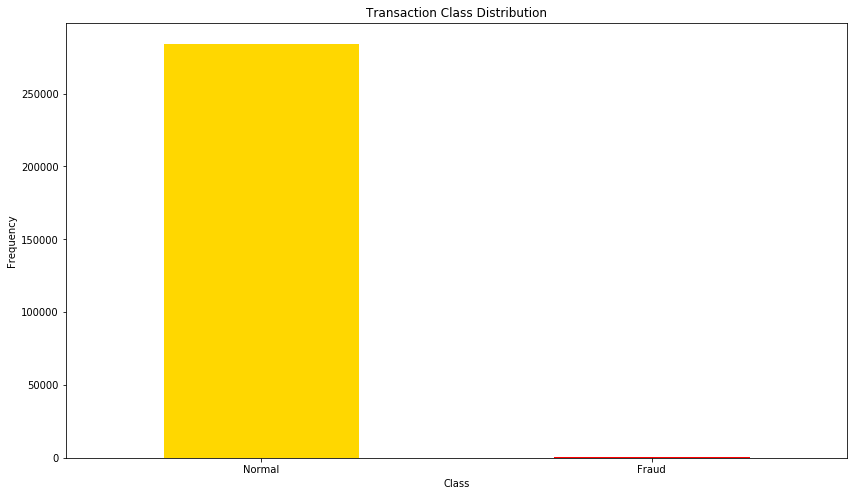

In [14]:
fraud = len(data.loc[data['Class']==1])
normal = len(data.loc[data['Class']==0])
print('Fraud values : ', fraud)
print('Normal are : ', normal)

data['Class'].value_counts(sort=True).plot.bar(color=['gold','red'])

plt.xticks(range(2), LABELS, rotation=0)    # this LABELS - converts 0,1 into Normal , Fraud
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Create independent and dependent features, the imbalanced dataset is taken care by algorithm which we use.
  
columns = data.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting 
target = "Class"

# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]    # Class

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)   

(284807, 30)
(284807,)


In [16]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


# --------------------------------------------------------------------------------

## 1.Down (Under) Sampling

#### It will generate new independent and dependent features based on the count and the Down-sampling of the output.

In [17]:
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [18]:
# Implementing Undersampling for Handling Imbalanced 

nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)    # X_res have : 492 - fraud, 492-normal total=984   and  y_res have : 984 Class labels.  

In [19]:
X_res.shape,y_res.shape

((984, 30), (984,))

In [20]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


# ---------------------------------------------------------------------------------

# 2.Up (Over) Sampling

In [27]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [28]:
# Implementing Oversampling for Handling Imbalanced 

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

X_res.shape,y_res.shape

((567562, 30), (567562,))

In [29]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


In [30]:
# RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(ratio=1)   # ratio=1 means : go acc. majority and create data 1:1 for X,y 
                                   # ratio=0.5 means : similarly, 0.5=1/2  becomes--> 2:1 for X,y data points.

X_train_res, y_train_res = os.fit_sample(X, Y)

In [31]:
X_train_res.shape,y_train_res.shape

((568630, 30), (568630,))

In [32]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [33]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.5)

X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)

X_train_res1.shape,y_train_res1.shape

((424734, 30), (424734,))

In [34]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283446, 1: 141288})
